In [48]:
import numpy as np
import torch
import torch.utils.data
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as tvtransforms
import torch.nn.functional

In [51]:
img = '/home/latai/Documents/Master_thesis_v2/data/test5/class_segmentation/Scene01/15-deg-left/frames/classSegmentation/Camera_0/classgt_00000.png'

im = Image.open(img)
im = list(im.getdata())

In [49]:
mapping = { (0, 0, 0): 0,        # 0 = Undefined
            (210, 0, 200): 1,    # 1 = Terrain
            (90, 200, 255): 2,   # 2 = Sky
            (0, 199, 0): 3,      # 3 = Tree
            (90, 240, 0): 4,     # 4 = Vegetation
            (140, 140, 140): 5,  # 5 = Building
            (100, 60, 100): 6,   # 6 = Road
            (250, 100, 255): 7,  # 7 = GuardRail
            (255, 255, 0): 8,    # 8 = TrafficSign
            (200, 200, 0): 9,    # 9 = TrafficLight
            (255, 130, 0): 10,   # 10 = Pole
            (80, 80, 80): 11,    # 11 = Misc
            (160, 60, 60): 12,   # 12 = Truck
            (255, 127, 80): 13,  # 13 = Car
            (0, 139, 139): 14}   # 14 = Van

mask = []
for i in pixel_values:
    mask.append(mapping[i])
print(mask)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [13]:
img = '/home/latai/Documents/Master_thesis_v2/data/test4/label_valid_n/4600.png'

im = Image.open(img)
width, height = im.size
width, height

(320, 240)

In [31]:
A = np.array(mask)
B = np.reshape(A, (375, 1242))

In [32]:
B.shape

(375, 1242)

In [33]:
from matplotlib import cm
im = Image.fromarray(np.uint8(cm.gist_earth(B)*255))

In [34]:
im.size

(1242, 375)

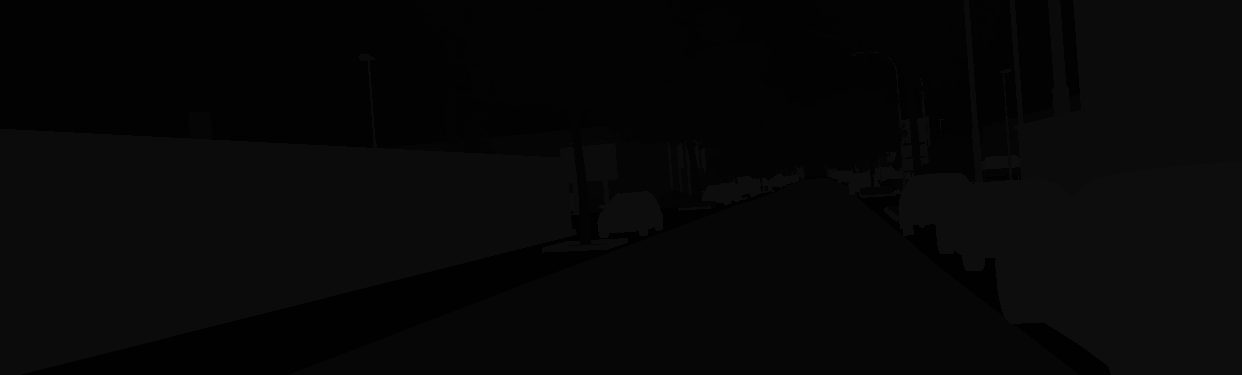

In [35]:
im = Image.fromarray(np.uint8(B), 'L')
im

In [30]:
import numpy as np
from PIL import Image

# gradient between 0 and 1 for 256*256
array = np.linspace(0,1,256*246)

# reshape to 2d
mat = np.reshape(array,(256,246))

# Creates PIL image
img = Image.fromarray( mat , 'L')
img.size

(246, 256)

In [92]:
import os

def test():
    mapping = { (0, 0, 0): 0,        # 0 = Undefined
                (210, 0, 200): 1,    # 1 = Terrain
                (90, 200, 255): 2,   # 2 = Sky
                (0, 199, 0): 3,      # 3 = Tree
                (90, 240, 0): 4,     # 4 = Vegetation
                (140, 140, 140): 5,  # 5 = Building
                (100, 60, 100): 6,   # 6 = Road
                (250, 100, 255): 7,  # 7 = GuardRail
                (255, 255, 0): 8,    # 8 = TrafficSign
                (200, 200, 0): 9,    # 9 = TrafficLight
                (255, 130, 0): 10,   # 10 = Pole
                (80, 80, 80): 11,    # 11 = Misc
                (160, 60, 60): 12,   # 12 = Truck
                (255, 127, 80): 13,  # 13 = Car
                (0, 139, 139): 14}   # 14 = Van

    for entry in os.scandir('/home/latai/Documents/Master_thesis_v2/data/test5/class_segmentation/'):

        if os.path.isdir(entry.path) == True:
            for entry2 in os.scandir(entry.path):
                if os.path.isdir(entry2.path) == True:
                    for entry3 in os.scandir(entry2.path):
                        for entry4 in os.scandir(entry3.path):
                            print(entry4.path)
                            for entry5 in os.scandir(entry4.path):
                                
                                if entry5.path.split('/')[-1] in ['Camera_0', 'Camera_1']:
                                    directory = entry5.path.split('/')[-1]+'_n'
                                    parent_dir = entry4.path

                                    path = os.path.join(parent_dir, directory)

                                    if os.path.exists(path) is False:
                                        new_path = os.mkdir(path)
                                    for entry6 in os.scandir(entry5.path):
                                        im = Image.open(entry6.path)
                                        im = list(im.getdata())
                                        mask = []
                                        for i in im:
                                            mask.append(mapping[i])
                                        A = np.array(mask)
                                        B = np.reshape(A, (375, 1242))
                                        image = Image.fromarray(np.uint8(B), 'L')
                                        image.save(path+'/'+entry6.path.split('/')[-1])

In [91]:
path = "/home/latai/Documents/Master_thesis_v2/data/test5/class_segmentation/Scene01/15-deg-left/frames/classSegmentation/Camera_0"
print(path.split('/')[-1])
if path.split('/')[-1] in ['Camera_3', 'Camera_1']:
    print('True')

Camera_0


In [94]:
test()

/home/latai/Documents/Master_thesis_v2/data/test5/class_segmentation/Scene01/morning/frames/classSegmentation
/home/latai/Documents/Master_thesis_v2/data/test5/class_segmentation/Scene01/30-deg-right/frames/classSegmentation
/home/latai/Documents/Master_thesis_v2/data/test5/class_segmentation/Scene01/overcast/frames/classSegmentation
/home/latai/Documents/Master_thesis_v2/data/test5/class_segmentation/Scene01/fog/frames/classSegmentation
/home/latai/Documents/Master_thesis_v2/data/test5/class_segmentation/Scene01/30-deg-left/frames/classSegmentation
/home/latai/Documents/Master_thesis_v2/data/test5/class_segmentation/Scene01/sunset/frames/classSegmentation
/home/latai/Documents/Master_thesis_v2/data/test5/class_segmentation/Scene01/15-deg-left/frames/classSegmentation
/home/latai/Documents/Master_thesis_v2/data/test5/class_segmentation/Scene01/rain/frames/classSegmentation
/home/latai/Documents/Master_thesis_v2/data/test5/class_segmentation/Scene01/clone/frames/classSegmentation
/home/

In [ ]:
path = "/home/latai/Documents/Master_thesis_v2/data/test5/test/Camera_0/"

next(os.walk(path_to_data))